In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1")
df = df.dropna(subset=["CustomerID"])
df = df.drop_duplicates()
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df = df.reset_index(drop=True)

In [4]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Ticket Médio

In [5]:
df["TotalValue"] = df["Quantity"] * df["UnitPrice"]
ticket_medio = df.groupby("CustomerID")["TotalValue"].mean().mean()
ticket_medio

np.float64(28.868389374085748)

### Top 10 produtos mais vendidos

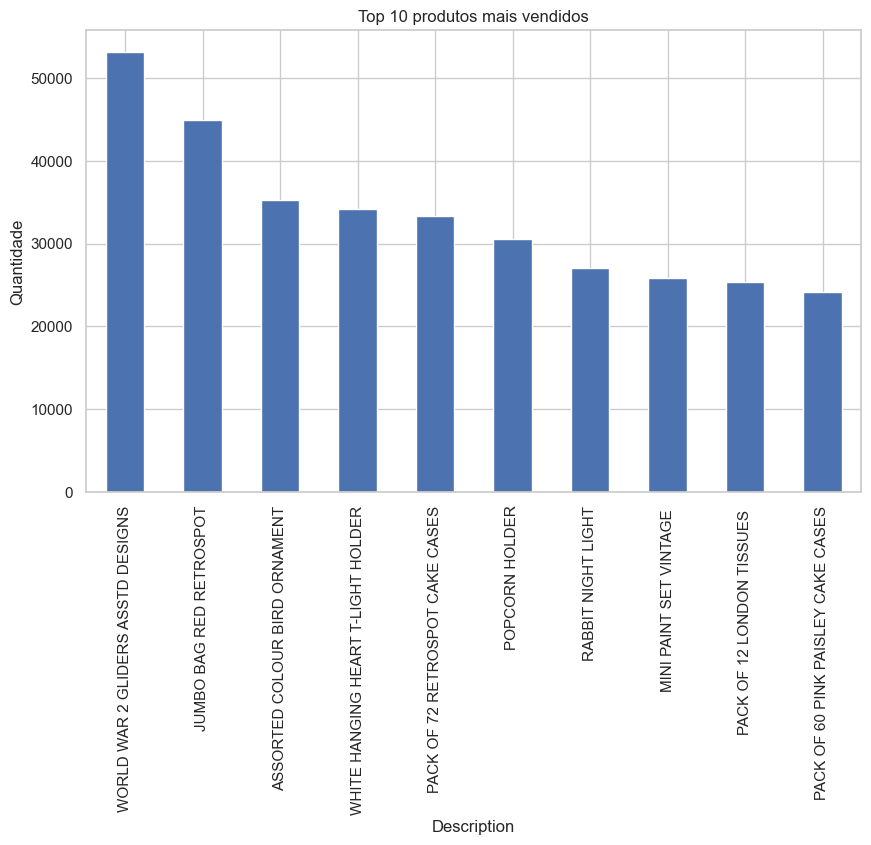

In [ ]:
top_produtos = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_produtos.plot(kind="bar")
plt.title("Top 10 produtos mais vendidos")
plt.ylabel("Quantidade")
plt.show()

### Vendas por país

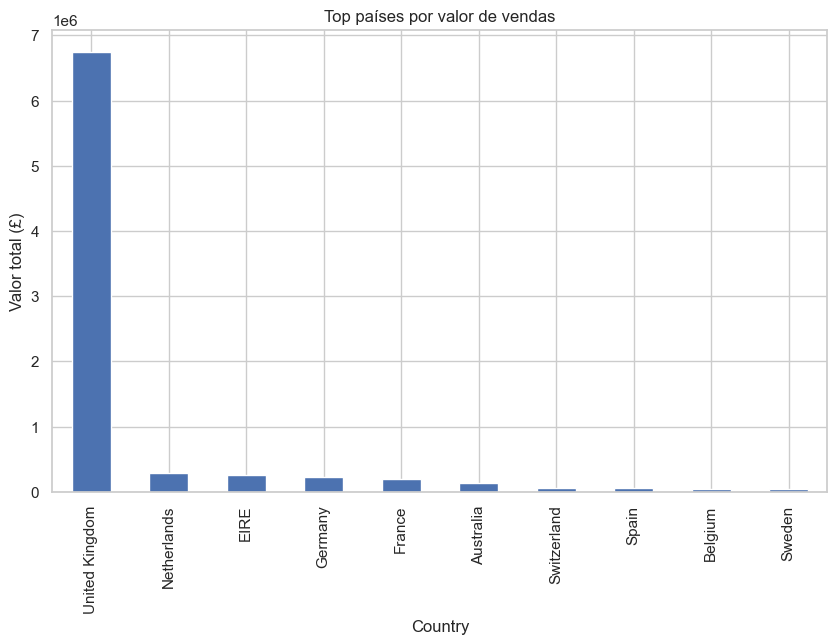

In [ ]:
vendas_por_pais = df.groupby("Country")["TotalValue"].sum().sort_values(ascending=False)
vendas_por_pais.head(10).plot(kind="bar")
plt.title("Top países por valor de vendas")
plt.ylabel("Valor total (£)")
plt.show()